In [1]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from librosa import display
from librosa.feature import melspectrogram

In [2]:
working_directory = os.getcwd()

In [3]:
training_directory = os.path.join(working_directory, 'train')

In [4]:
happy_path = os.path.join(training_directory, 'happy')

In [5]:
sad_path = os.path.join(training_directory, 'sad')

In [6]:
angry_path = os.path.join(training_directory, 'angry')

In [7]:
fear_path = os.path.join(training_directory, 'fear')

In [8]:
neutral_path = os.path.join(training_directory, 'neutral')

In [6]:
#feature extraction for happy for 14.wav data
data, sampling_rate = librosa.load(os.path.join(happy_path, '14.wav'), sr = 16000, res_type='kaiser_best')

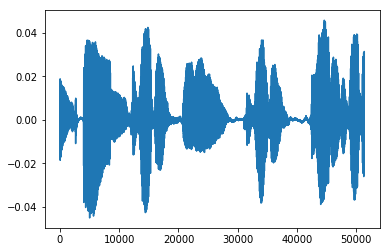

In [7]:
plt.plot(data)
plt.show()

In [8]:
 data

array([-0.00595093, -0.00601196, -0.00598145, ...,  0.02938843,
        0.02114868,  0.01208496], dtype=float32)

In [9]:
mel_power_spectrogram_feature = melspectrogram(data, sr = 16000, n_mels = 32)

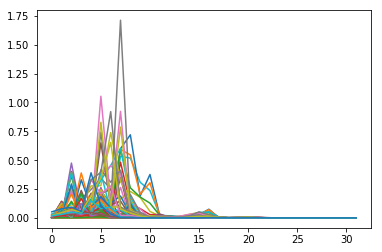

In [10]:
plt.plot(mel_power_spectrogram_feature)
plt.show()

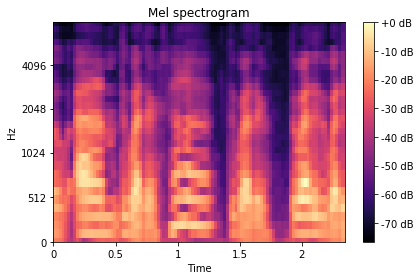

In [12]:
librosa.display.specshow(librosa.power_to_db(mel_power_spectrogram_feature, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [14]:
mel_power_spectrogram_feature

array([[2.92914137e-02, 2.74153054e-02, 1.29571846e-02, ...,
        3.70487720e-02, 1.65082198e-02, 6.02233037e-03],
       [1.07911065e-01, 3.41561139e-02, 2.65416084e-03, ...,
        8.19892250e-03, 4.89384914e-03, 1.39563682e-03],
       [1.21719345e-01, 3.83556411e-02, 2.71724164e-03, ...,
        1.90123788e-03, 1.09796505e-03, 5.03683696e-04],
       ...,
       [1.22502684e-06, 1.00599516e-06, 5.91522678e-07, ...,
        9.08861608e-08, 9.22079550e-08, 5.88591220e-08],
       [9.49973810e-07, 5.63699189e-07, 2.82532937e-07, ...,
        6.54561276e-08, 4.36622969e-08, 2.71256759e-08],
       [9.12288272e-07, 3.71291293e-07, 1.79057437e-07, ...,
        6.47467147e-08, 3.44748443e-08, 1.95457446e-08]], dtype=float32)

In [15]:
#now feature extraction function for whole dataset
def feature_extraction(dataset_path, sampling_rate, resampling_type):
    emotion_feature = []
    for wav_files in os.listdir(dataset_path):
        data, sampling_rate = librosa.load(os.path.join(dataset_path, wav_files), sr = sampling_rate, 
                                           res_type = resampling_type)
        mel_power_spectrogram_feature = melspectrogram(data, sr = sampling_rate)
        emotion_feature.append(mel_power_spectrogram_feature)
    return emotion_feature

In [16]:
happy_features = feature_extraction(happy_path, 16000, 'kaiser_best')

In [17]:
happy_features[:2]

[array([[5.71143217e-02, 5.99680506e-02, 1.28612164e-02, ...,
         1.53015815e-02, 7.58510269e-03, 4.96137701e-03],
        [6.85045719e-02, 2.19749752e-02, 1.67728739e-03, ...,
         2.31518270e-03, 5.46257128e-04, 6.90118817e-04],
        [2.69004926e-02, 1.35180447e-02, 8.58081388e-04, ...,
         4.64227138e-04, 3.34330980e-04, 3.34739045e-04],
        ...,
        [8.55764119e-06, 8.00734051e-06, 4.61991403e-05, ...,
         8.71065922e-08, 6.02316135e-08, 5.62046694e-08],
        [1.12332764e-05, 9.83778318e-06, 3.16439000e-05, ...,
         3.31555938e-08, 4.38185204e-08, 4.89917440e-08],
        [1.28678139e-05, 7.95127471e-06, 2.11120969e-05, ...,
         4.47606041e-08, 3.91696027e-08, 2.94328171e-08]], dtype=float32),
 array([[5.0608262e-02, 5.2062701e-02, 2.4137661e-02, ..., 1.2424890e-03,
         1.6837496e-03, 7.6282746e-04],
        [5.5006798e-03, 4.0433323e-03, 1.3144498e-03, ..., 2.0741846e-04,
         4.1478351e-04, 4.7707383e-04],
        [1.5479319e-02

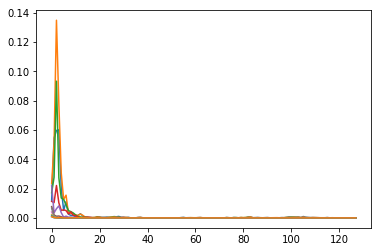

In [18]:
plt.plot(happy_features[2])
plt.show()